In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Set a nice style for the plots
sns.set_theme(style="whitegrid", palette="viridis")

In [3]:
try:
    data = pd.read_csv("bankura_wheat_combined.csv")
    print("✅ Dataset loaded successfully!")
    display(data.head())
except FileNotFoundError:
    print("❌ Error: 'bankura_wheat_combined.csv' not found.")
    print("Please make sure the CSV file is in the same directory as your Jupyter Notebook.")

✅ Dataset loaded successfully!


,Year,District,Wheat_Yield_t_ha,year,precipitation_flowering,precipitation_growth,precipitation_harvest,precipitation_sowing,LST_flowering,LST_growth,LST_harvest,LST_sowing
0,2001,Bankura,2.425,2001,0.739821,0.056043,1.536742,0.000677,32.577857,25.986522,35.744290,27.265742
1,2002,Bankura,2.470,2002,0.665464,0.117000,0.789935,0.000000,32.150179,25.044913,27.572323,26.532258
2,2003,Bankura,2.582,2003,1.803500,0.415587,1.199355,0.028548,29.986893,20.786826,33.152548,25.759839
3,2004,Bankura,2.688,2004,0.017862,0.251261,1.709161,0.002194,32.673345,23.648826,35.589677,26.526290
4,2005,Bankura,2.648,2005,1.188643,0.374630,0.701935,0.021484,31.434571,24.278609,34.097774,25.620806


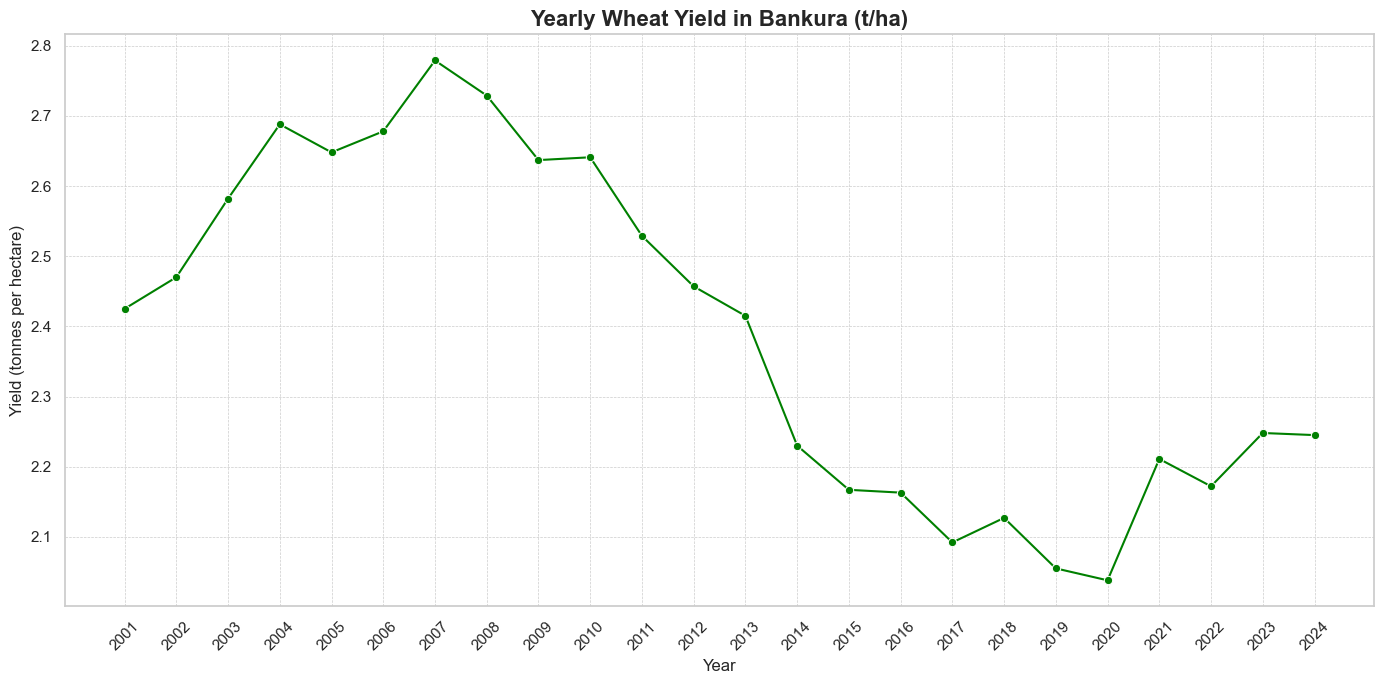

In [4]:
# Set the figure size for a wider plot
plt.figure(figsize=(14, 7))

# Create the plot using seaborn for a nice look
sns.lineplot(data=data, x='year', y='Wheat_Yield_t_ha', marker='o', color='g')

# Add titles and labels for clarity
plt.title('Yearly Wheat Yield in Bankura (t/ha)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Yield (tonnes per hectare)', fontsize=12)
plt.xticks(data['year'], rotation=45) # Ensure all years are shown on the x-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [6]:
# The name of your yield column
YIELD_COLUMN_NAME = 'Wheat_Yield_t_ha'

# Define the climate features (X) and the target variable (y)
features = [
    'LST_sowing', 'precipitation_sowing',
    'LST_growth', 'precipitation_growth',
    'LST_flowering', 'precipitation_flowering',
    'LST_harvest', 'precipitation_harvest'
]

# Drop any rows with missing data to ensure the model runs smoothly
data.dropna(subset=features + [YIELD_COLUMN_NAME], inplace=True)

X = data[features]
y = data[YIELD_COLUMN_NAME]

# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data prepared for modeling:")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Data prepared for modeling:
Number of training samples: 19
Number of testing samples: 5


In [7]:
# Initialize the model with 100 decision trees
# random_state=42 ensures that the results are reproducible
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train (fit) the model on the training data
rf_model.fit(X_train, y_train)

print("✅ Random Forest model has been successfully trained!")

✅ Random Forest model has been successfully trained!


In [8]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("📈 Model Performance Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")
print(f"\nThis means our model can explain {r2:.1%} of the variance in wheat yield.")

📈 Model Performance Evaluation:
Mean Absolute Error (MAE): 0.161
R-squared (R²): 0.325

This means our model can explain 32.5% of the variance in wheat yield.



🔍 Feature Importance Rankings:


,Feature,Importance
4,LST_flowering,0.271660
1,precipitation_sowing,0.188265
3,precipitation_growth,0.180263
5,precipitation_flowering,0.110662
0,LST_sowing,0.099337
2,LST_growth,0.057801
6,LST_harvest,0.047287
7,precipitation_harvest,0.044724


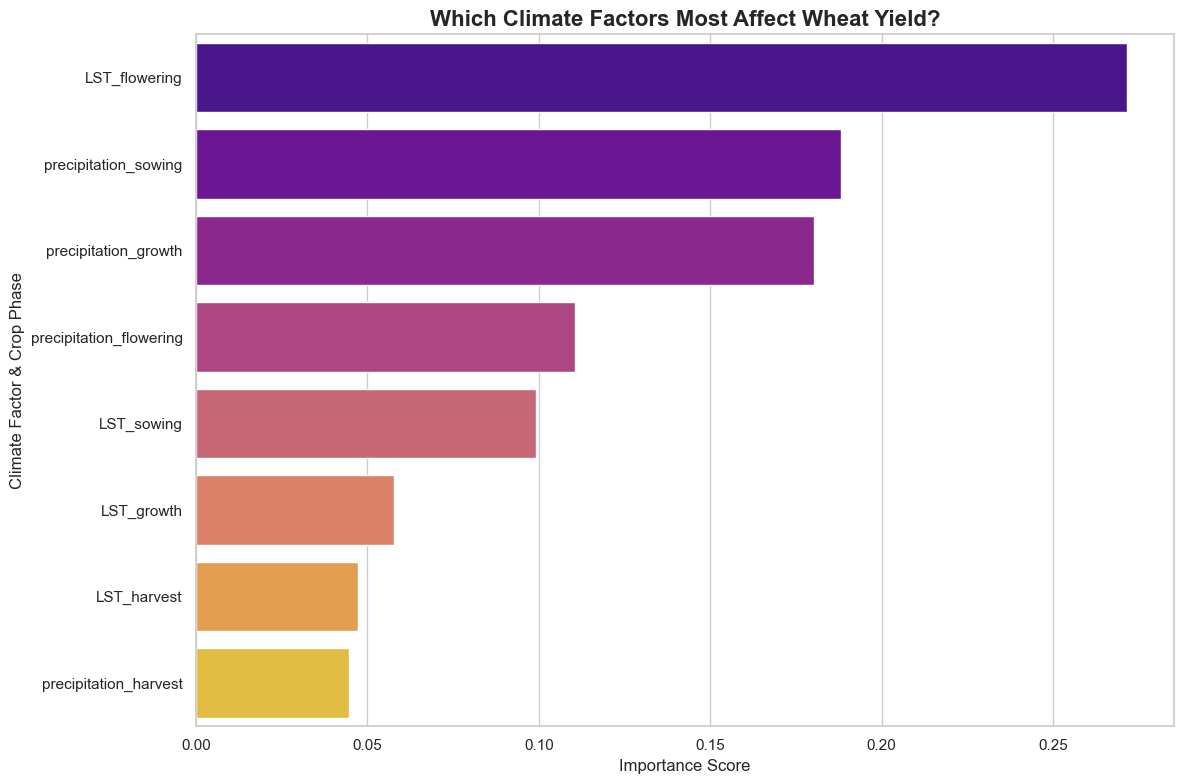

In [9]:
# Get importance scores from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for easier handling and sorting
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n🔍 Feature Importance Rankings:")
display(feature_importance_df)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')

# Add titles and labels
plt.title('Which Climate Factors Most Affect Wheat Yield?', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Climate Factor & Crop Phase', fontsize=12)
plt.tight_layout()
plt.show()

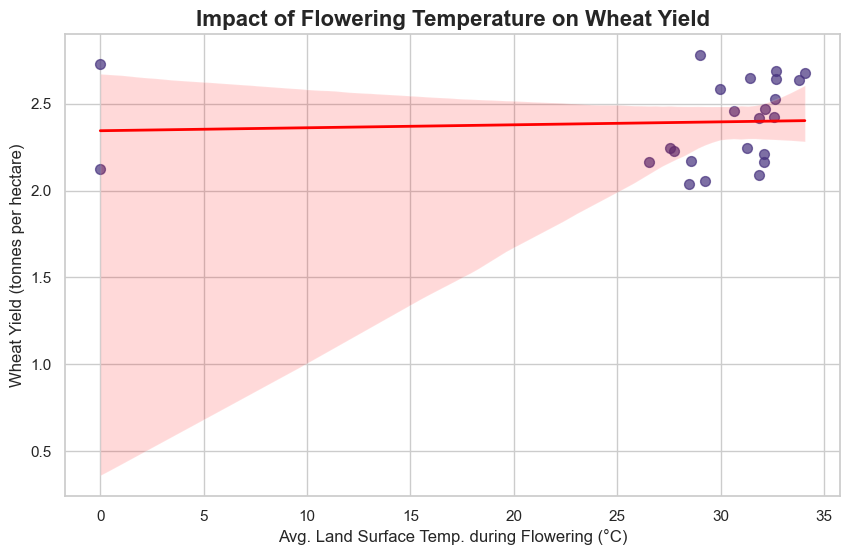

In [10]:
# Create a regression plot for the most important feature
plt.figure(figsize=(10, 6))

# Use seaborn's regplot to create a scatter plot with a fitted regression line
sns.regplot(data=data, x='LST_flowering', y='Wheat_Yield_t_ha', 
            scatter_kws={'s': 50, 'alpha': 0.7}, 
            line_kws={'color': 'red', 'lw': 2})

plt.title('Impact of Flowering Temperature on Wheat Yield', fontsize=16, weight='bold')
plt.xlabel('Avg. Land Surface Temp. during Flowering (°C)', fontsize=12)
plt.ylabel('Wheat Yield (tonnes per hectare)', fontsize=12)
plt.grid(True)
plt.show()

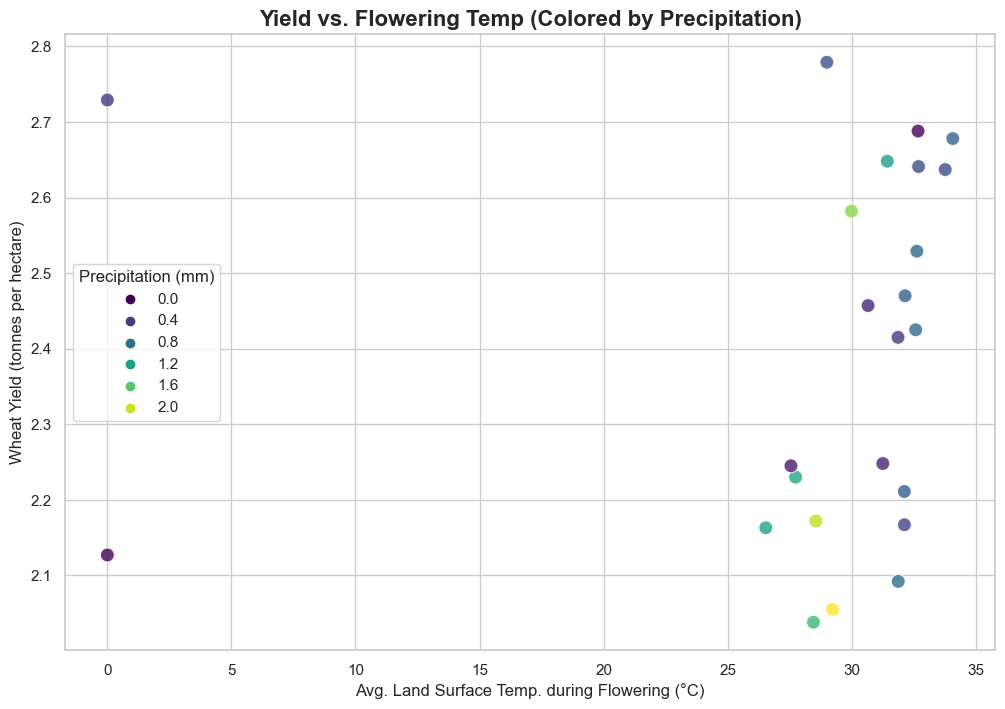

In [11]:
plt.figure(figsize=(12, 8))

# Create a scatter plot where the color of each point is determined by precipitation
sns.scatterplot(data=data, 
                x='LST_flowering', 
                y='Wheat_Yield_t_ha', 
                hue='precipitation_flowering', # Use precipitation for color
                palette='viridis',             # A color-friendly palette
                s=100,                         # Make points larger
                alpha=0.8)

plt.title('Yield vs. Flowering Temp (Colored by Precipitation)', fontsize=16, weight='bold')
plt.xlabel('Avg. Land Surface Temp. during Flowering (°C)', fontsize=12)
plt.ylabel('Wheat Yield (tonnes per hectare)', fontsize=12)
plt.legend(title='Precipitation (mm)')
plt.grid(True)
plt.show()

In [15]:
# Sort the data by yield to find the best and worst years
sorted_data = data.sort_values(by='Wheat_Yield_t_ha')

# Get the 5 worst (lowest) and 5 best (highest) yield years
worst_years = sorted_data.head(5).assign(Category='Worst 5 Years')
best_years = sorted_data.tail(5).assign(Category='Best 5 Years')

# Combine them into a new dataframe for plotting
comparison_df = pd.concat([worst_years, best_years])

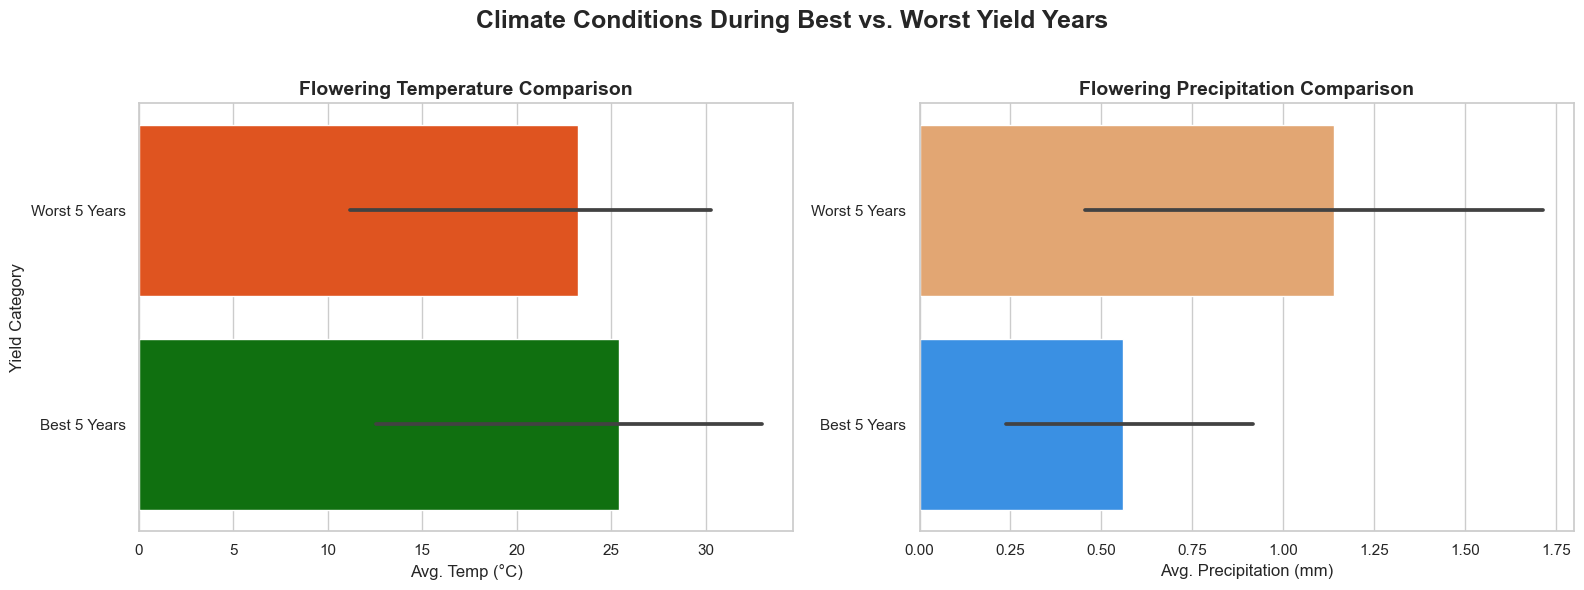

In [16]:
# We use the same 'comparison_df' from the previous step
# If you don't have it in memory, uncomment and run these lines:
# sorted_data = data.sort_values(by='Wheat_Yield_t_ha')
# worst_years = sorted_data.head(5).assign(Category='Worst 5 Years')
# best_years = sorted_data.tail(5).assign(Category='Best 5 Years')
# comparison_df = pd.concat([worst_years, best_years])

# Create a figure with two subplots next to each other
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- First Plot: LST_flowering ---
sns.barplot(ax=axes[0], data=comparison_df, x='LST_flowering', y='Category', palette=['orangered', 'green'])
axes[0].set_title('Flowering Temperature Comparison', fontsize=14, weight='bold')
axes[0].set_xlabel('Avg. Temp (°C)')
axes[0].set_ylabel('Yield Category')

# --- Second Plot: precipitation_flowering ---
sns.barplot(ax=axes[1], data=comparison_df, x='precipitation_flowering', y='Category', palette=['sandybrown', 'dodgerblue'])
axes[1].set_title('Flowering Precipitation Comparison', fontsize=14, weight='bold')
axes[1].set_xlabel('Avg. Precipitation (mm)')
axes[1].set_ylabel('') # Hide y-label for the second plot

# Adjust layout and add a main title
plt.suptitle('Climate Conditions During Best vs. Worst Yield Years', fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
plt.show()


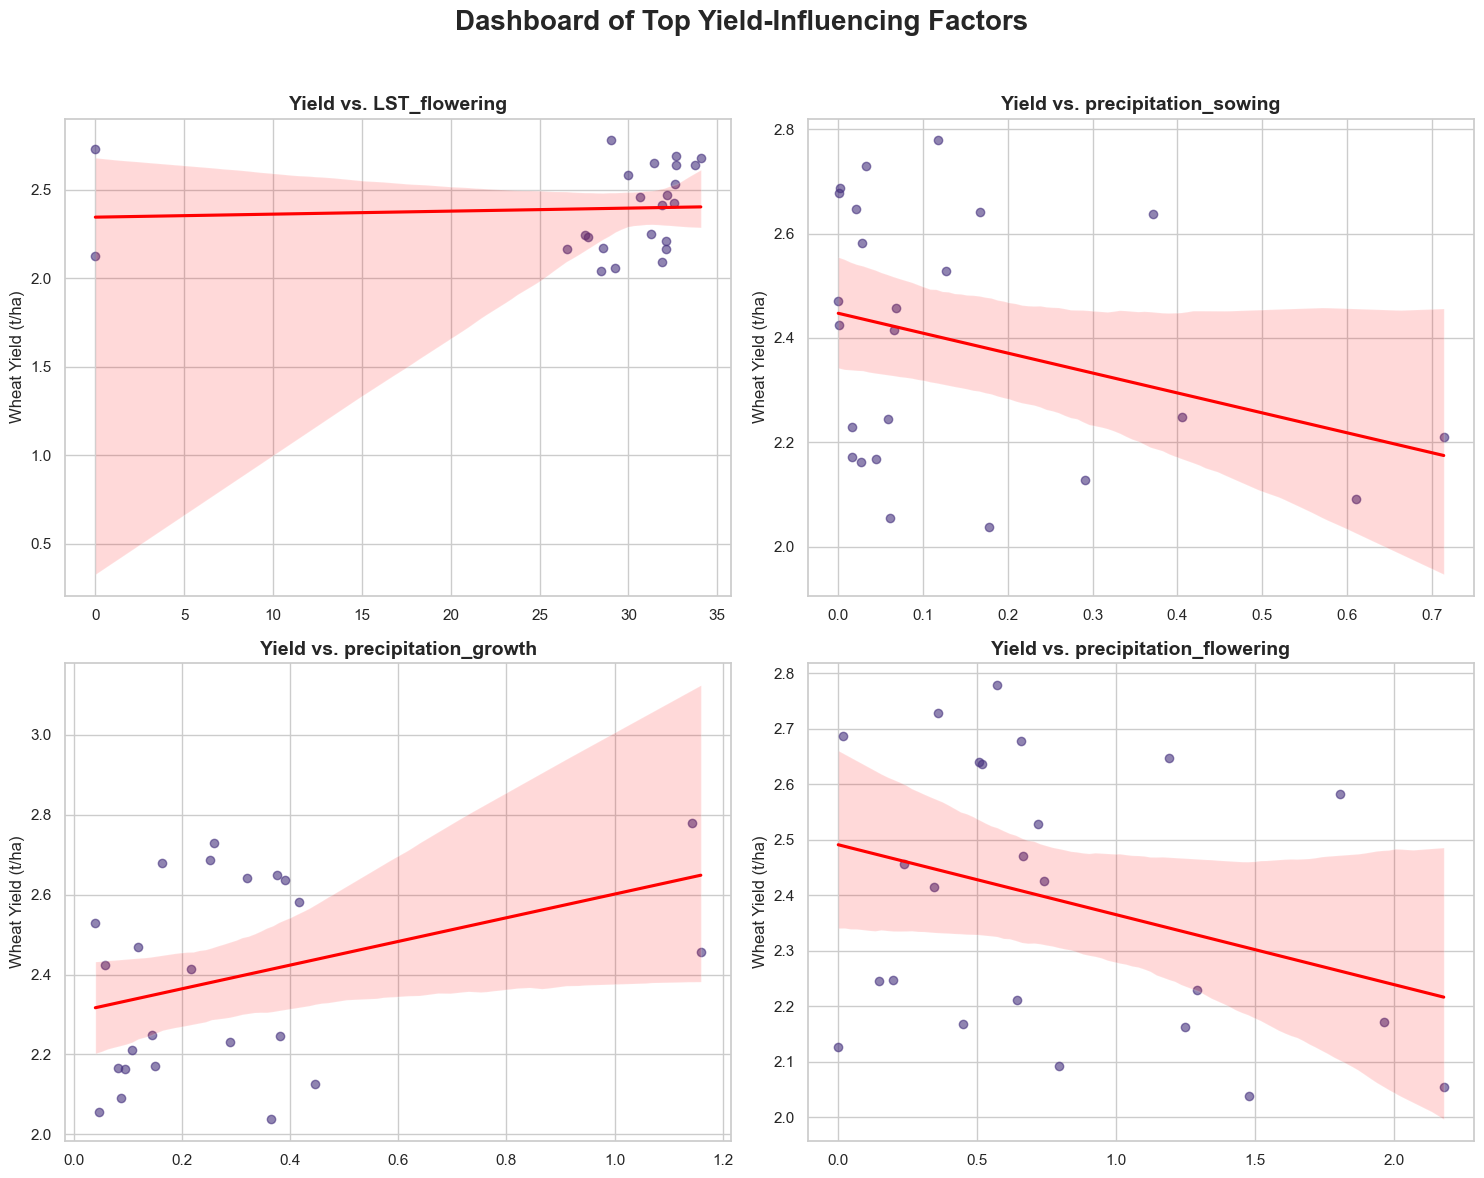

In [17]:
# Select the top 4 most important features from your list
top_features = [
    'LST_flowering', 
    'precipitation_sowing', 
    'precipitation_growth', 
    'precipitation_flowering'
]

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten() # Flatten the 2x2 array into a 1D array for easy looping

# Loop through the top features and create a regplot for each
for i, feature in enumerate(top_features):
    sns.regplot(ax=axes[i], data=data, x=feature, y='Wheat_Yield_t_ha',
                scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    axes[i].set_title(f'Yield vs. {feature}', fontsize=14, weight='bold')
    axes[i].set_xlabel('') # We can add more descriptive labels if needed
    axes[i].set_ylabel('Wheat Yield (t/ha)')

plt.suptitle('Dashboard of Top Yield-Influencing Factors', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

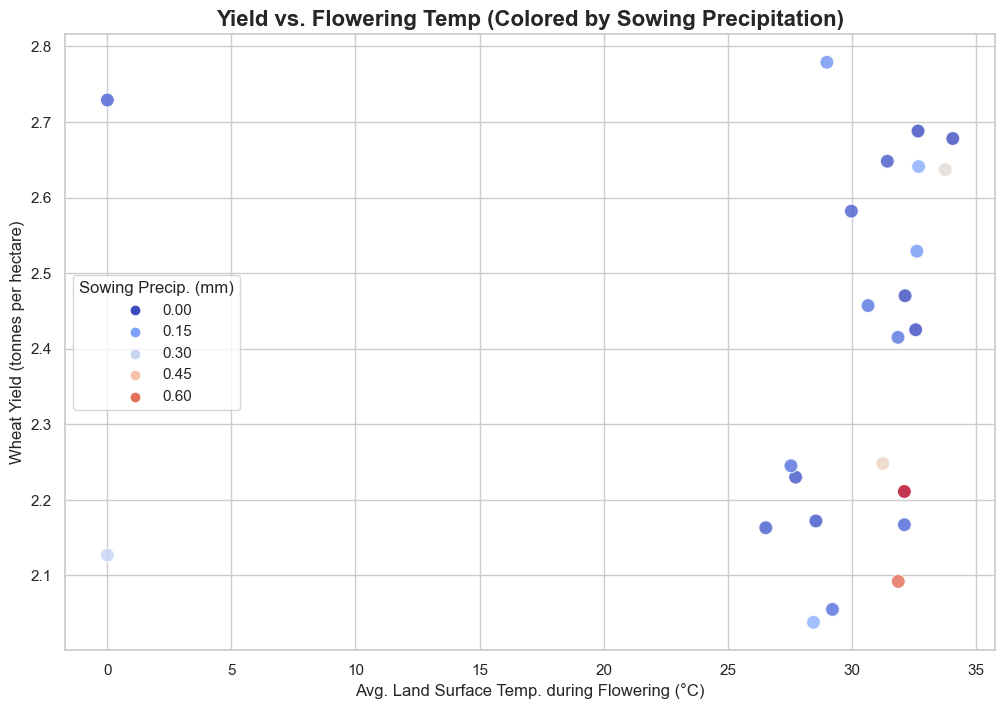

In [18]:
plt.figure(figsize=(12, 8))

# Scatter plot where color is based on the second most important feature
sns.scatterplot(data=data, 
                x='LST_flowering', 
                y='Wheat_Yield_t_ha', 
                hue='precipitation_sowing', # Color by sowing precipitation
                palette='coolwarm',
                s=100,
                alpha=0.8)

plt.title('Yield vs. Flowering Temp (Colored by Sowing Precipitation)', fontsize=16, weight='bold')
plt.xlabel('Avg. Land Surface Temp. during Flowering (°C)', fontsize=12)
plt.ylabel('Wheat Yield (tonnes per hectare)', fontsize=12)
plt.legend(title='Sowing Precip. (mm)')
plt.grid(True)
plt.show()

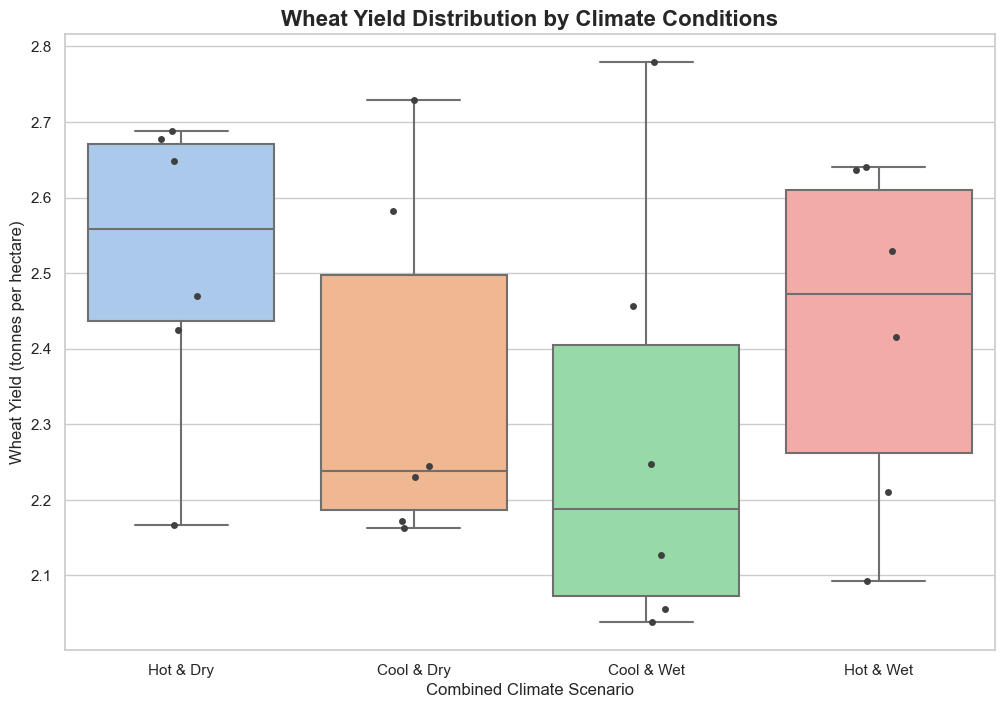

In [19]:
# Create categorical variables based on the median of the top two features
temp_median = data['LST_flowering'].median()
precip_median = data['precipitation_sowing'].median()

data['Temp Condition'] = data['LST_flowering'].apply(lambda x: 'Hot' if x > temp_median else 'Cool')
data['Precip Condition'] = data['precipitation_sowing'].apply(lambda x: 'Wet' if x > precip_median else 'Dry')

# Combine the conditions into a single category for plotting
data['Combined Condition'] = data['Temp Condition'] + ' & ' + data['Precip Condition']

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Combined Condition', y='Wheat_Yield_t_ha', palette='pastel')
sns.stripplot(data=data, x='Combined Condition', y='Wheat_Yield_t_ha', color=".25") # Overlay raw data points

plt.title('Wheat Yield Distribution by Climate Conditions', fontsize=16, weight='bold')
plt.xlabel('Combined Climate Scenario', fontsize=12)
plt.ylabel('Wheat Yield (tonnes per hectare)', fontsize=12)
plt.show()